<a href="https://colab.research.google.com/github/mahdibaghbanzadeh/deepath/blob/master/deepBreaks_demo_googleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DeepBreaks  
First Attempt

In [2]:
# pip install biopython

     |████████████████████████████████| 2.3 MB 5.4 MB/s 


In [5]:
#importing libraries
from Bio import SeqIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# importing metaData
metaData = pd.read_csv('/content/drive/MyDrive/omicsEye/deepBreaks/data/LITE-MAR/meta_RodOpsinLambdaMax.tsv', sep='\t', index_col=0)

In [8]:
metaData.head()

,Species,LambdaMax
1_KC250344.1_Acipenser_transmontanus,Acipenser_transmontanus,540.0
2_AF137208.1_Amia_calva,Amia_calva,527.0
3_HQ444181.1_Gymnothorax_favagineus,Gymnothorax_favagineus,488.0
4_HQ444182.1_Gymnothorax_reticularis,Gymnothorax_reticularis,486.0
5_HQ444180.1_Rhinomuraena_quaesita,Rhinomuraena_quaesita,498.0


In [9]:
#importing seq data
seq_dict = {rec.id : list(rec.seq) for rec in SeqIO.parse("/content/drive/MyDrive/omicsEye/deepBreaks/data/LITE-MAR/msa_RodOpsinLambdaMax.fasta", "fasta")}
df = pd.DataFrame.from_dict(seq_dict, orient='index')

#naming each position as p + its rank
df.columns = [str('p'+str(i)) for i in range(df.shape[1])]

#replacing - with nan
df.replace(['-'], np.nan, inplace=True)
df.shape

(175, 356)

In [10]:
#dropping posiotns that have more than 2% missing values
treshold = df.shape[0]*.02
cl = df.columns[df.isna().sum()>treshold]

df.drop(cl , axis = 1, inplace=True)

In [11]:
#impute missing values with the mode of its column
for cl in df.columns:
    df[cl] = df[cl].fillna(df[cl].mode()[0])

In [12]:
#merge with meta data
df = df.merge(metaData['LambdaMax'], how = 'left', left_index=True, right_index=True)

## Modeling

In [13]:
# pip install --use-deprecated=legacy-resolver pycaret

In [15]:
df.head()

,p41,p42,p43,p44,p45,p46,p47,p48,p49,p50,...,p288,p289,p290,p291,p292,p293,p294,p295,p296,LambdaMax
1_KC250344.1_Acipenser_transmontanus,A,Y,M,F,F,L,I,L,V,G,...,T,I,P,A,F,F,A,K,S,540.0
2_AF137208.1_Amia_calva,A,Y,M,F,F,L,I,I,T,G,...,T,I,P,A,F,F,A,K,S,527.0
3_HQ444181.1_Gymnothorax_favagineus,A,Y,M,F,F,L,I,I,A,G,...,T,I,P,S,F,F,A,K,S,488.0
4_HQ444182.1_Gymnothorax_reticularis,A,Y,M,F,F,L,I,L,A,G,...,T,I,P,S,F,F,A,K,S,486.0
5_HQ444180.1_Rhinomuraena_quaesita,A,Y,M,F,F,L,I,I,A,G,...,T,I,P,A,F,F,A,K,S,498.0


In [4]:
from pycaret.regression import *

In [14]:
exp_reg101 = setup(data = df, target = 'LambdaMax', silent = True,
                   session_id=123,
                   ignore_low_variance=True,
                  feature_selection=True, ) 

,Description,Value
0,session_id,123
1,Target,LambdaMax
2,Original Data,"(175, 257)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,256
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(122, 263)"


In [16]:
top5 = compare_models(n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,4.3813,5.848610e+01,6.402700e+00,6.055000e-01,0.0126,0.0087,0.019
br,Bayesian Ridge,4.4047,5.862650e+01,6.396700e+00,6.037000e-01,0.0126,0.0087,0.032
rf,Random Forest Regressor,4.7390,5.888700e+01,6.825100e+00,5.544000e-01,0.0134,0.0094,0.568
gbr,Gradient Boosting Regressor,4.7319,6.877220e+01,7.155800e+00,4.778000e-01,0.0141,0.0093,0.114
ada,AdaBoost Regressor,5.4482,7.229010e+01,7.811600e+00,4.596000e-01,0.0154,0.0108,0.122
lasso,Lasso Regression,6.1445,9.711700e+01,9.220400e+00,2.844000e-01,0.0181,0.0121,0.021
et,Extra Trees Regressor,5.8156,8.031120e+01,8.210400e+00,2.826000e-01,0.0162,0.0116,0.556
lightgbm,Light Gradient Boosting Machine,6.2047,9.969600e+01,9.337800e+00,1.907000e-01,0.0184,0.0123,0.077
en,Elastic Net,6.9661,1.147873e+02,1.006230e+01,1.629000e-01,0.0199,0.0138,0.021
knn,K Neighbors Regressor,7.5598,1.285175e+02,1.077130e+01,-1.600000e-03,0.0213,0.0150,0.066


### Feature importance in top models

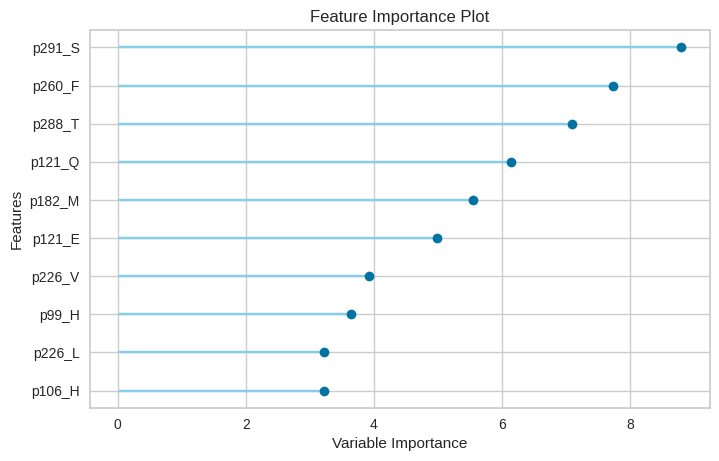

In [17]:
plot_model(top5[0], 'feature')

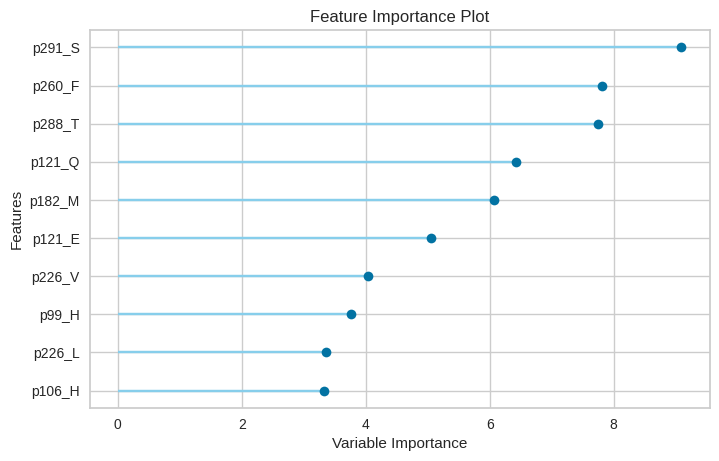

In [18]:
plot_model(top5[1], 'feature')

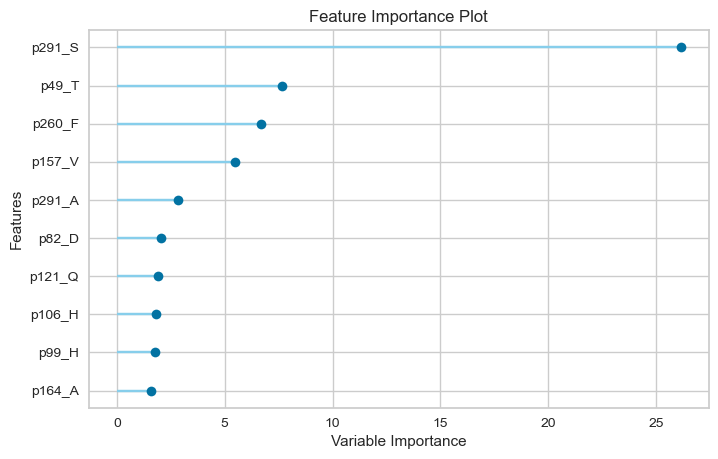

In [ ]:
plot_model(top5[2], 'feature')

### Plots of 4 most important positions

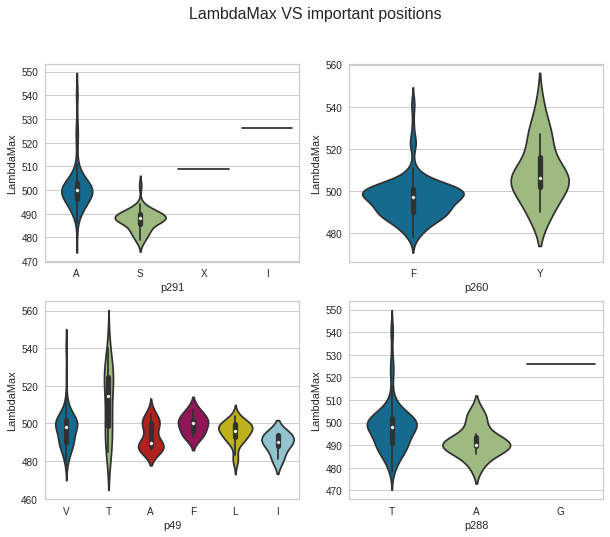

In [19]:
fig,ax = plt.subplots(figsize=(10, 8), sharey = 'row')
fig.suptitle('LambdaMax VS important positions', fontsize=16)
for nm , cl in enumerate(['p291', 'p260', 'p49', 'p288']):
    plt.subplot(2,2,nm+1)
    sns.violinplot(x=cl, y='LambdaMax', data=df)
plt.show()